# <center>Project - Predicting Loan Paid by Borrowers  

### Problem statement:

The given dataset is from Dream Club which connects borrowers with investors. We will use lending data from 2007-2010 and build a classifier model to predict whether or not the borrower has paid back their loan in full.

 

### Here are what the columns represent:
credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
installment: The monthly installments owed by the borrower if the loan is funded.
log.annual.inc: The natural log of the self-reported annual income of the borrower.
dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
fico: The FICO credit score of the borrower.
days.with.cr.line: The number of days the borrower has had a credit line.
revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
not.fully.paid: whether or not the borrower paid back their loan in full

## <span style='color:Purple'>Overall Approach -
* Load the dataset and print the metadata in the notebook
* Convert categorical to numerical data - Label Encoding
* HeatMap to check correlation 
* Spliiting Test and Train by 80/20 ratio
* Building a classifier model using the Decision Tree algorithm
* Confusion Matrix & Classification Report - Before Pruning
* Pruning the Decision Tree
* Confusion Matrix & Classification Report - After Pruning
* Plotting decision Tree Model
* Stratified cross-validation accuracy

### Import the libraries 

In [1]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
from matplotlib          import pyplot

# For max displays
pd.set_option('display.max_columns', None)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Encoding
from sklearn.preprocessing import LabelEncoder

# Model
from sklearn.metrics         import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import classification_report
from sklearn                 import metrics
from sklearn                 import tree
from sklearn.model_selection import cross_val_score

### Load the Dataset

In [2]:
df = pd.read_csv('loan_data.csv')

### Check the shape of the Dataset

In [3]:
df.shape

(9578, 14)

### Check the first few rows of the dataset

In [4]:
df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


### Retrieving information about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Checking statistical summary of the data

In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Check for Missing values
<span style='background : yellow' > **Observation:** </span>There are no missing values

In [7]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### Check for Duplicate rows
<span style='background : yellow' > **Observation:** </span>There are no duplicate rows

In [8]:
df.duplicated().sum()

0

### Encoding 

In [9]:
# Converting Categorical feature "purpose" to numerical
le = LabelEncoder()
df.purpose = le.fit_transform(df.purpose)

In [10]:
df.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


### HeatMap
<span style='background : yellow' > **Observation:** </span>
* delinq.2yrs has the least corelation with output - hence we will be dropping this column going forward
* int.rate has the most corelation with output

<AxesSubplot:>

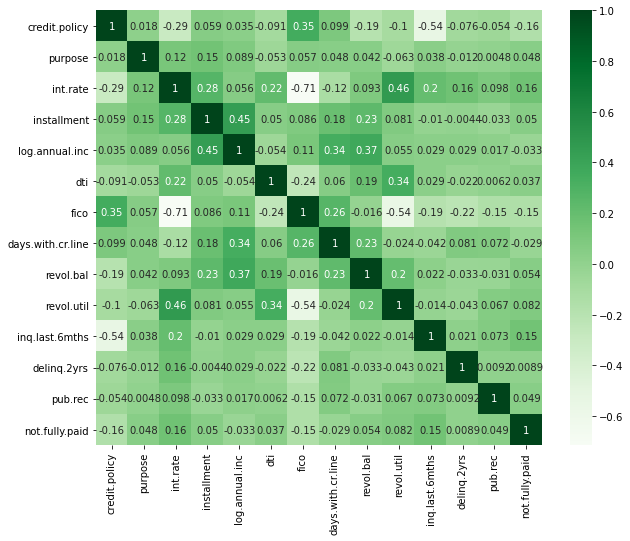

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),cmap='Greens', annot=True)

In [12]:
df = df.drop('delinq.2yrs', axis=1)

### Splitting of Dataset - Features & Label

In [13]:
# X would contain all the features and y contains the Label of the dataset.
X = df.drop('not.fully.paid', axis=1)
y = df[['not.fully.paid']]

### Split train and test data

In [14]:
# Spliiting Test and Train by 80/20 ratio. 
# Also used Stratified sampling to have equal proportion in test and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=42,
                                                    stratify = y)

print("Shape of Training set {0}".format(X_train.shape))
print("Shape of Test set {0}".format(X_test.shape))

Shape of Training set (7662, 12)
Shape of Test set (1916, 12)


## <center><span style='color:Purple'>Building Classifier - Decision Tree Algorithm

### Building Classifier

In [15]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for Train dataset
y_train_pred = clf.predict(X_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [16]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Decision Tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Decision Tree model accuracy(in %): 74.06054279749478


## Confusion Matrix & Classification Report - Before Pruning

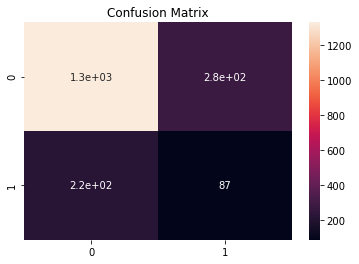

True Positives: 1332
False Negatives: 277
False Positives: 220
True Negatives: 87


In [17]:
cnf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.show()

print('True Positives:', cnf_matrix[0,0])
print('False Negatives:', cnf_matrix[0,1])
print('False Positives:', cnf_matrix[1,0])
print('True Negatives:', cnf_matrix[1,1])

In [18]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1609
           1       0.24      0.28      0.26       307

    accuracy                           0.74      1916
   macro avg       0.55      0.56      0.55      1916
weighted avg       0.76      0.74      0.75      1916



## Pruning
Pruning Parameters
* Criterion - Gini index or Entropy
* max_depth - Reduce the depth of the tree to build a generalized tree

<span style='background : yellow' > **Observation:** </span> Using Entropy, the accuracy score for decision tree classifier is better as compared to gini index.

In [19]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)

y_pred_pruned_gini = dtree.predict(X_test)
print('Criterion = gini:', accuracy_score(y_test, y_pred_pruned_gini))

Criterion = gini: 0.7447807933194155


In [20]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred_pruned_entrpy = dtree.predict(X_test)
print('Criterion = entropy:', accuracy_score(y_test, y_pred_pruned_entrpy))

Criterion = entropy: 0.7578288100208769


### Max-Depth Vs accuarcy

In [21]:
# Checking Depth Vs accuarcy for a range iteration.
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion = 'gini', max_depth = i)
 dtree.fit(X_train, y_train)
 y_pred_gini = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, y_pred_gini))
 
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 y_pred_entrpy = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, y_pred_entrpy))
 
 max_depth.append(i)
 d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
                   'acc_entropy':pd.Series(acc_entropy),
                   'max_depth':pd.Series(max_depth)})


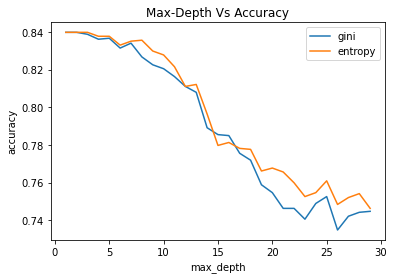

In [22]:
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Max-Depth Vs Accuracy')
plt.legend()
plt.show()

### Decision Tree using selected criterion and max-depth

In [23]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(X_train, y_train)
y_pred_pruned_entropy = dtree.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
print("Decision Tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_pruned_entropy)*100)

Decision Tree model accuracy(in %): 83.97703549060542


## Confusion Matrix & Classification Report - After Pruning

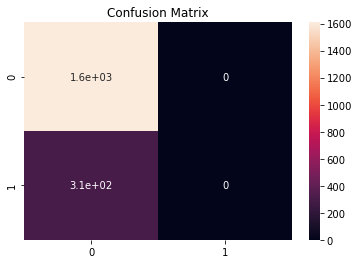

True Positives: 1609
False Negatives: 0
False Positives: 307
True Negatives: 0


In [24]:
cnf_matrix = confusion_matrix(y_test, y_pred_pruned_entropy)

sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.show()

print('True Positives:', cnf_matrix[0,0])
print('False Negatives:', cnf_matrix[0,1])
print('False Positives:', cnf_matrix[1,0])
print('True Negatives:', cnf_matrix[1,1])

In [25]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_pruned_entropy))


Classification Report

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.00      0.00      0.00       307

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916



## Decision tree model

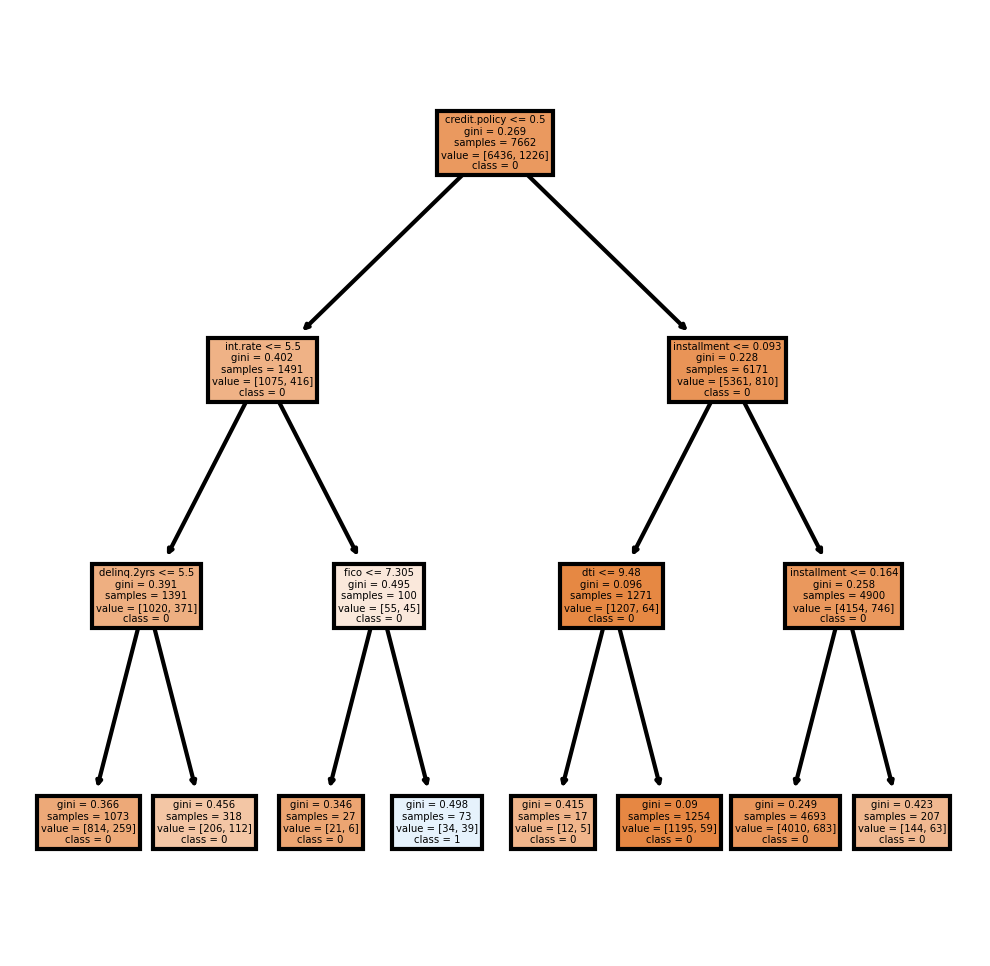

In [26]:
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
features = ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti','fico', 'days.with.cr.line', 
            'revol.bal', 'revol.util','inq.last.6mths', 'delinq.2yrs', 'pub.rec']
clas=['0','1']


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = features, 
               class_names = clas,
               filled = True);
fig.savefig('imagename.png')

## Stratified cross-validation accuracy

Text(0.5, 1.0, 'Average score: 0.7010751098588937')

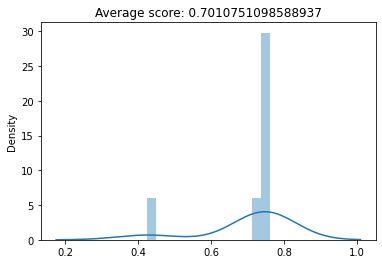

In [27]:
# create model
clf = tree.DecisionTreeClassifier()

# evaluate model
cv_scores = cross_val_score(clf, X = X, y = y, cv = 7)

# Plot graph 
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

## <Center><span style='color:Purple'>Conclusion

### Before Pruning
* Decision Tree model accuracy (in %): 74.217
* Classification Report

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1609
           1       0.24      0.28      0.26       307

### After Pruning
* Decision Tree model accuracy (in %): 83.977
* Classification Report

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.00      0.00      0.00       307

### Stratified cross validation accuarcy 
* For 7 Folds - 70.1%